In [1]:
# importins the library in the notebooks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print("sucessfully")

sucessfully


In [2]:
df=pd.read_csv("E:\\6th semmmm\\feature engineering datasets\\handlings the miossing datas\\data_science_job.csv")
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [3]:
# find how many missing  datas are in the notebooks n
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index     479
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64

In [4]:
df.shape

(19158, 13)

In [5]:
# find trhe total number of percentage of the missing datas 
((df.isnull().sum()/df.shape[0]))*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [6]:
# finsd the percentyage of thye misisng datas using the mean 
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

# we cannot completely remove the data of the male because we remove the 1/4th of the datas 


In [7]:
# extrsact the columns name where the muisisng data columns are less than the 5% 
cols=[var for var in df.columns if df[var].isnull().mean()<0.05 and df[var].isnull().mean()>0]

In [8]:
cols# the columns there ther are values less than the 5 %  of the columns datras are missing 

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [9]:
# cgheck the samples
df[cols].sample(10)

,city_development_index,enrolled_university,education_level,experience,training_hours
6805,0.926,no_enrollment,Masters,17.0,26.0
16566,0.624,NaN,NaN,4.0,107.0
47,0.920,no_enrollment,Graduate,19.0,52.0
11394,0.624,no_enrollment,Graduate,9.0,68.0
17613,0.920,no_enrollment,Graduate,19.0,42.0
10320,0.920,no_enrollment,Graduate,20.0,28.0
16343,0.579,no_enrollment,Graduate,3.0,62.0
4714,0.836,no_enrollment,Graduate,8.0,130.0
2852,0.865,no_enrollment,Graduate,8.0,30.0
1470,0.722,no_enrollment,Graduate,11.0,91.0


In [10]:
df['education_level'].value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

# how many data will be left if we drop the nan values completely

In [11]:
len(df[cols].dropna())/len(df)

0.8968577095730244

In [12]:
df[cols].dropna().isnull().sum()  # this are the data where there is no any nan values 

city_development_index    0
enrolled_university       0
education_level           0
experience                0
training_hours            0
dtype: int64

In [13]:
cols  # these are the only columns whwre there is only less than the 5%^ of the data are missings 

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [14]:
# if we completely remove the null values  data from the dataframe whow many b% of the data are remain
df.dropna().isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
training_hours            0
target                    0
dtype: int64

In [15]:
# this gives the percentage where if we remove the complete missing data only 44 % data will remain
len(df.dropna())/len(df)

0.44023384486898426

In [16]:
df.dropna().isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
training_hours            0
target                    0
dtype: int64

# removing the data if the columns miss is less than the 5%

In [17]:
new_df=df[cols].dropna()

In [18]:
new_df.shape  # around 10 percentage of the data we are removed 

(17182, 5)

In [19]:
new_df.shape[0]/df.shape[0]*100 

89.68577095730244

In [20]:
# check the null values 
new_df.isnull().sum()

city_development_index    0
enrolled_university       0
education_level           0
experience                0
training_hours            0
dtype: int64

In [21]:
df[cols].dropna().head()  # this will give the data sets with bthe no missing data on it

,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
4,0.767,no_enrollment,Masters,20.0,8.0
5,0.764,Part time course,Graduate,11.0,24.0


In [22]:
print(" hellow world")

 hellow world


<AxesSubplot:>

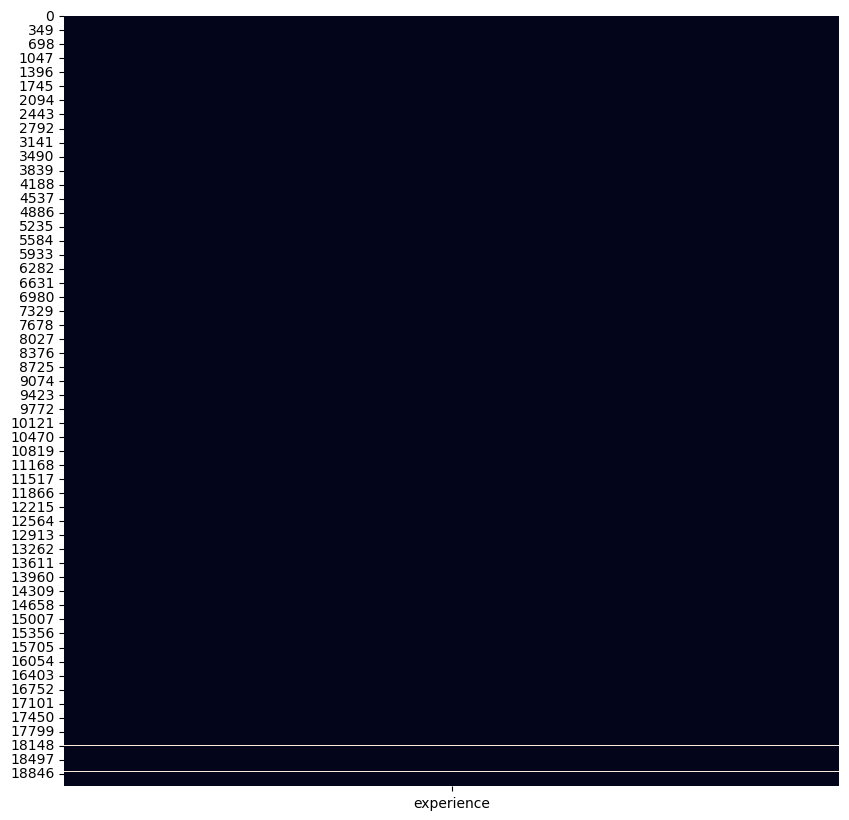

In [93]:
# show the missing data in the heatmaps
plt.figure(figsize=(10,10))
sns.heatmap(df[['experience']].isnull(),cbar=False)

<AxesSubplot:>

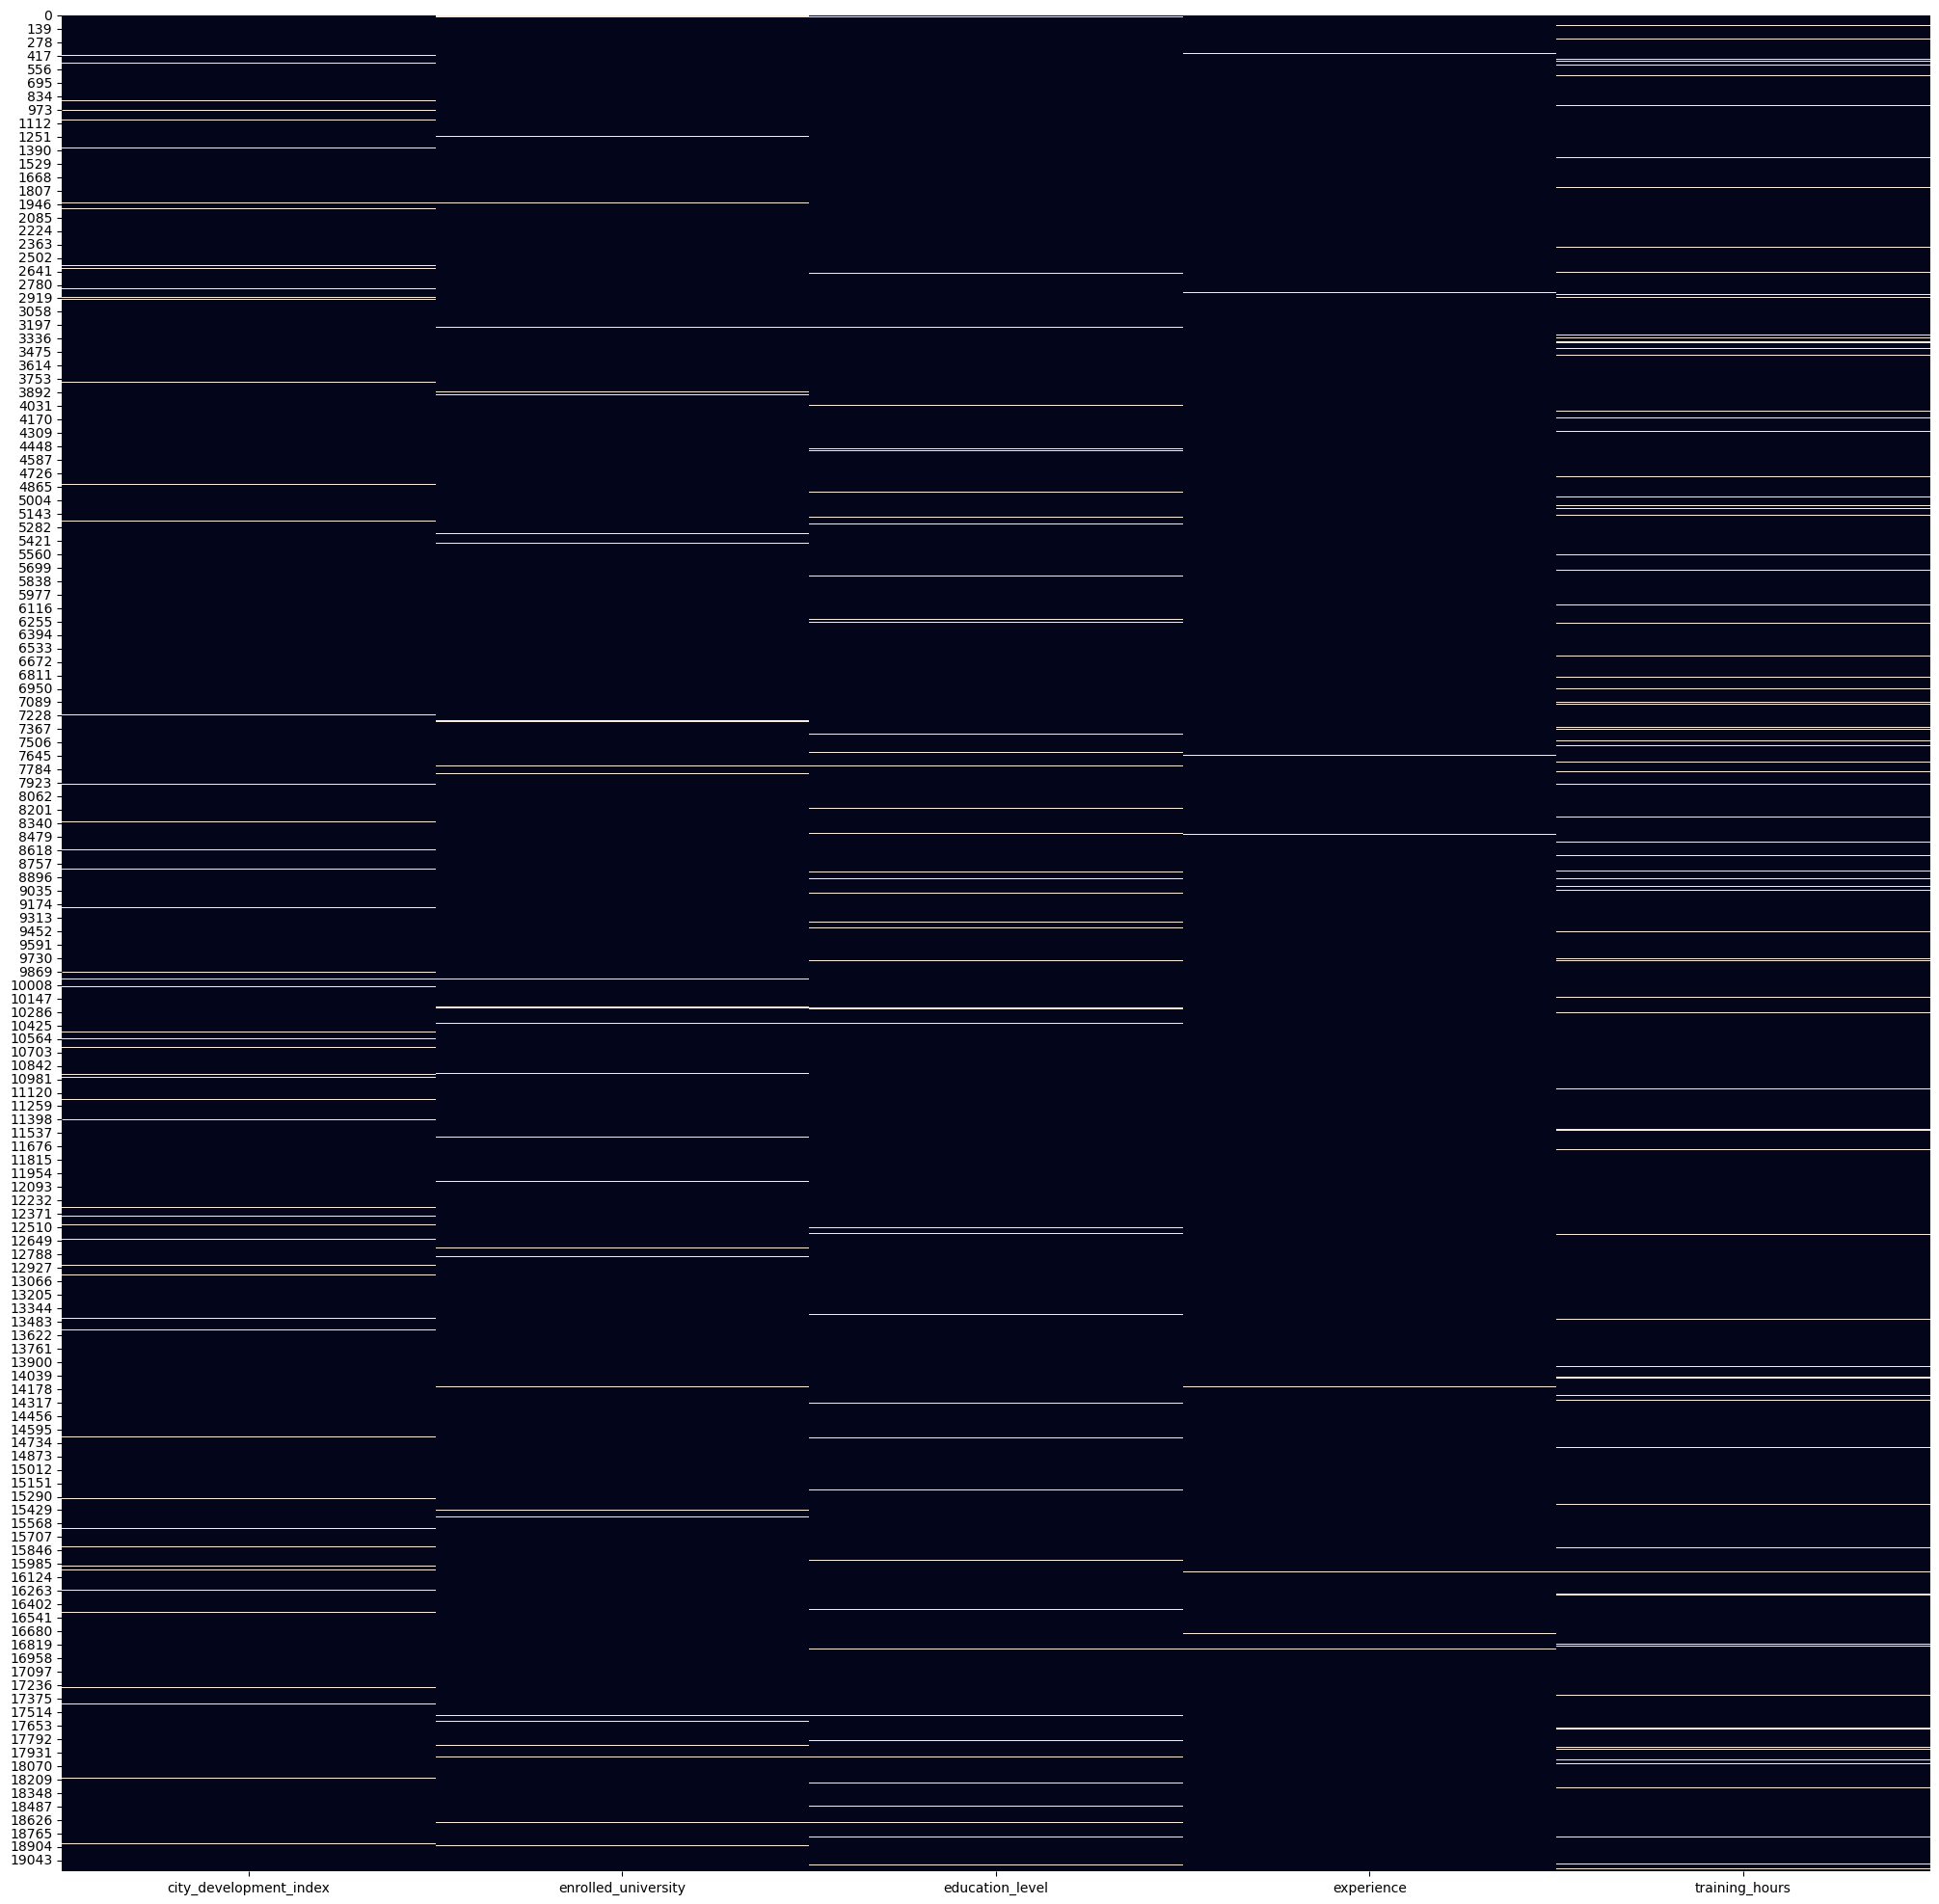

In [94]:
# see the full heartmap to see the null values in our datsets 
plt.figure(figsize=(25,25))
sns.heatmap(df[cols].isnull(),cbar=False) # this shows the data are null in random
# the missing data are in the random orders 
# if the cbar=True the co,or bar is appeared in the rioght side 

<AxesSubplot:>

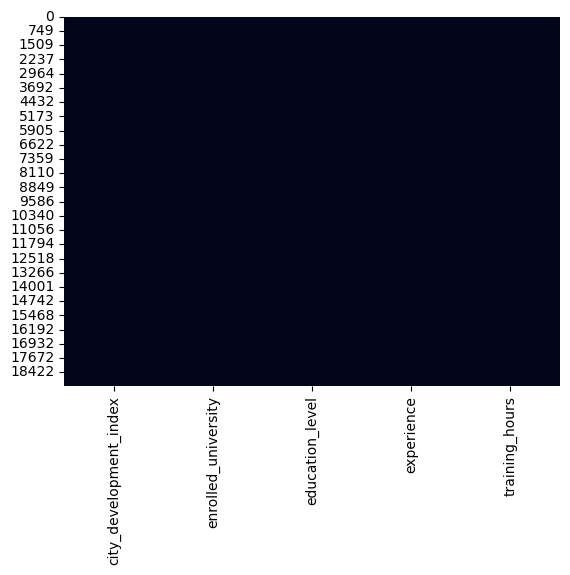

In [31]:
# sns.distplot(df[row])
# see the null values iun the new data frames 
sns.heatmap(new_df[cols].isnull(),cbar=False)  # here there is no missing data so the data is 

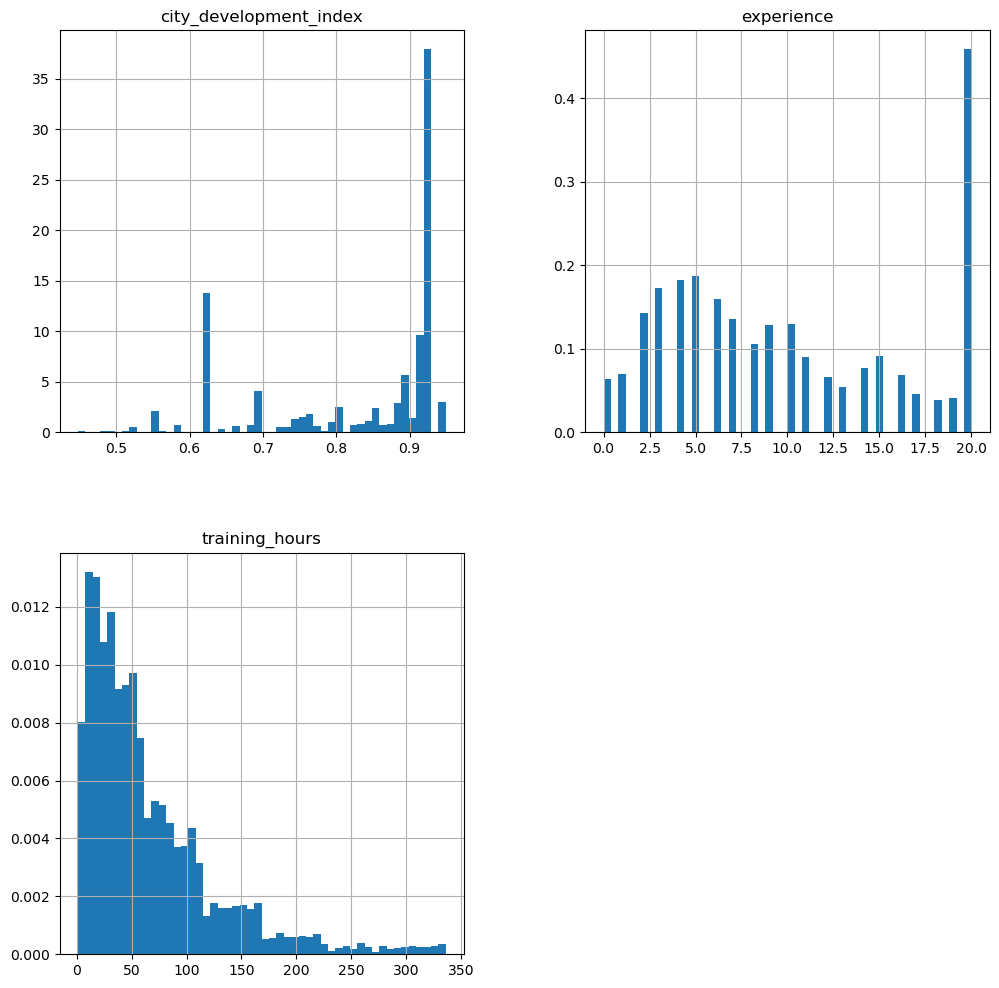

In [33]:
# see the distribution  of the data before and after removing the data
new_df.hist(bins=50,density=True,figsize=(12,12))
plt.show() # this is the histpogram after removing the missing dta from our datasets 

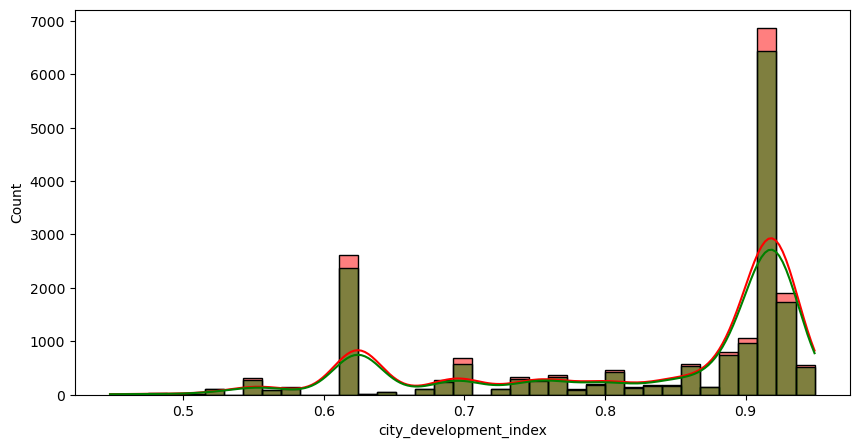

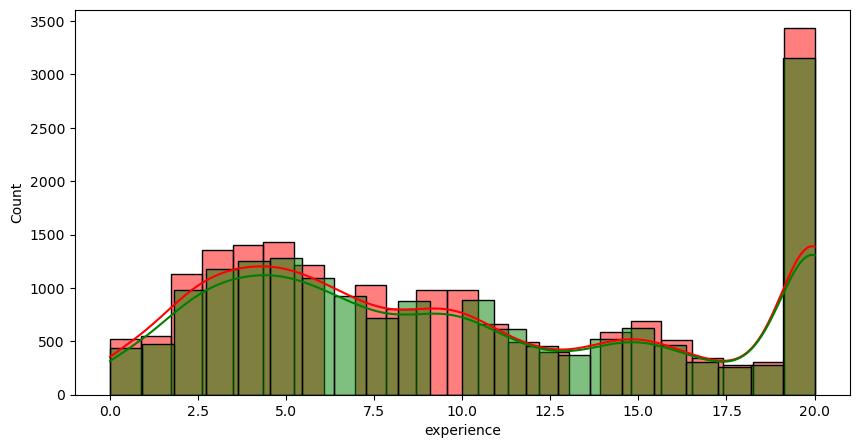

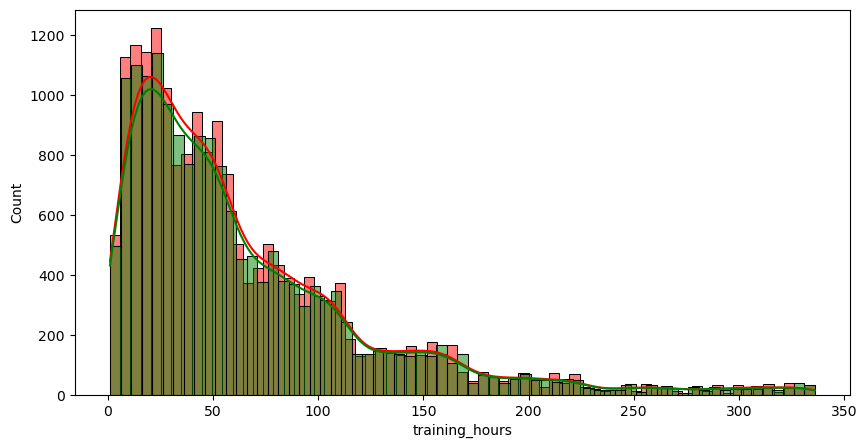

In [56]:
# see the distribution of the data before and after ewmoving the null values from datasets 
# compairing the original and the new datasets after rwemoving the null values 
# thwey are al,ost similar overlapping 
l1=['city_development_index','experience','training_hours']
for i in l1:
    plt.figure(figsize=(10,5))
    sns.histplot(df[i],color='red',kde=True)
    sns.histplot(new_df[i],color='green',kde=True)  # red is nthe original data and red is thje ckleaned datas 

In [40]:
new_df.columns

Index(['city_development_index', 'enrolled_university', 'education_level',
       'experience', 'training_hours'],
      dtype='object')

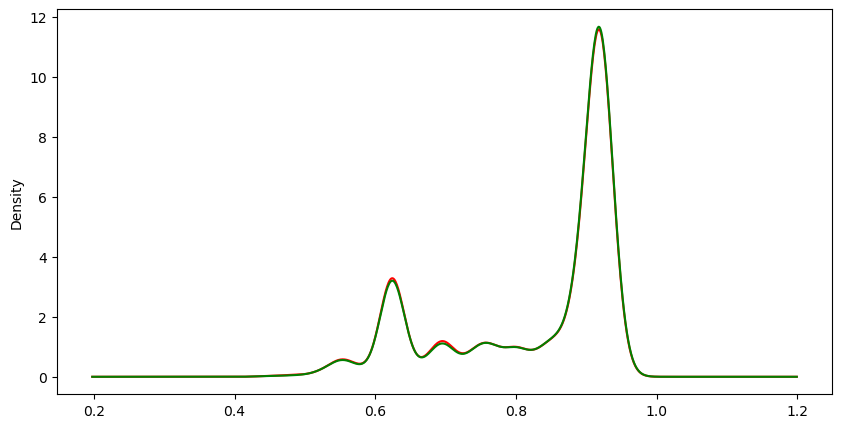

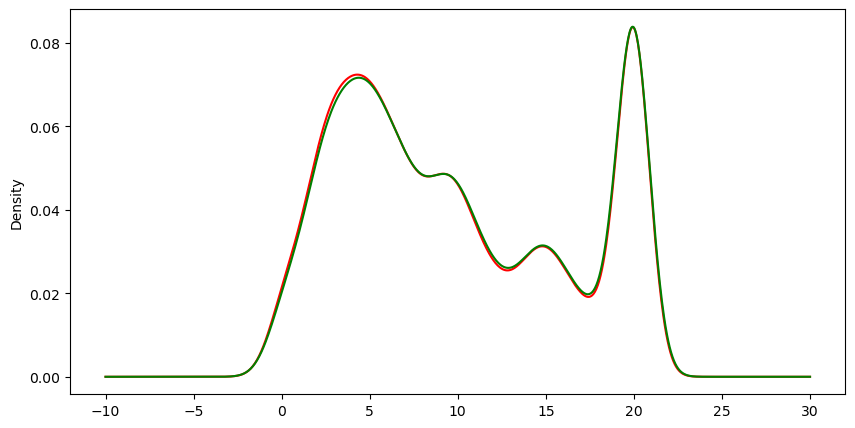

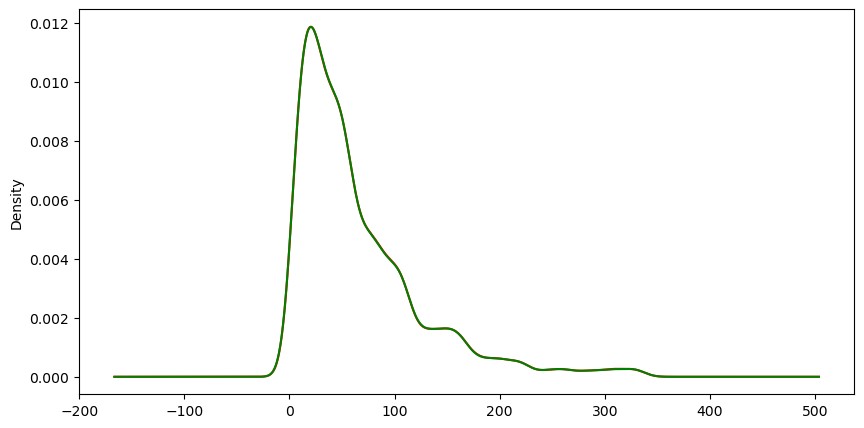

In [55]:
# show the only kde plots only 
l1=['city_development_index','experience','training_hours']
for i in l1:
    plt.figure(figsize=(10,5))
    df[i].plot.density(color='red') # red is the original data 
    new_df[i].plot.density(color='green')  # green is the cleaned datas  

# for the categorical data if the data we are removed completely the ratio before the removing and after the removing is should be equivalents , then we can perform the completely data removing if the data is in the random

In [57]:
new_df.columns

Index(['city_development_index', 'enrolled_university', 'education_level',
       'experience', 'training_hours'],
      dtype='object')

In [58]:
df['enrolled_university'].value_counts()

no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

In [59]:
df.shape[0]

19158

In [60]:
13817/19158  # this code will givwe you the ratio

0.7212130702578557

In [61]:
new_df['enrolled_university'].value_counts()

no_enrollment       12632
Full time course     3449
Part time course     1101
Name: enrolled_university, dtype: int64

In [62]:
new_df.shape[0]

17182

In [63]:
12632/17182 # this will give the ratio of the new dataframes 

0.7351879874287045

# convert the data ratio into the dataframes 

In [68]:
temp=pd.concat([
    # percentage of observation per category, originbal data
    df['enrolled_university'].value_counts()/len(df),
    
    # percentage of observatiuons per category with the cleaned datas 
    new_df['enrolled_university'].value_counts()/len(new_df),
    
     np.abs(df['enrolled_university'].value_counts()/len(df)
            - new_df['enrolled_university'].value_counts()/len(new_df))
    
    
],axis=1)
temp.columns=['original','cca','difference']

# here the diference in the reation is minimum so we can perform the cca
# this can gives the informationa about the our data are missing in the random order 

In [69]:
temp

,original,cca,difference
no_enrollment,0.721213,0.735188,0.013975
Full time course,0.196106,0.200733,0.004627
Part time course,0.062533,0.064079,0.001546


In [72]:
# same performance is goes with the education_level
temp_df=pd.concat([
    # percentage of observation per category, originbal data
    df['education_level'].value_counts()/len(df),
    
    # percentage of observatiuons per category with the cleaned datas 
    new_df['education_level'].value_counts()/len(new_df),
    
     np.abs(df['education_level'].value_counts()/len(df)
            - new_df['education_level'].value_counts()/len(new_df))
    
    
],axis=1)
temp_df.columns=['original','cca','difference']


In [79]:
temp_df

,original,cca,difference
Graduate,0.605387,0.619835,0.014448
Masters,0.227633,0.234082,0.006449
High School,0.105282,0.107380,0.002097
Phd,0.021610,0.022116,0.000506
Primary School,0.016077,0.016587,0.000510


In [76]:
0.227633-0.234082  # here all the ration are similar 

-0.00644900000000001

In [77]:
0.234082-0.227633  3  0

0.00644900000000001

In [78]:
0.605387/0.619835  # the dividing ratuion should equivbalent to the 1 

0.9766905708777336

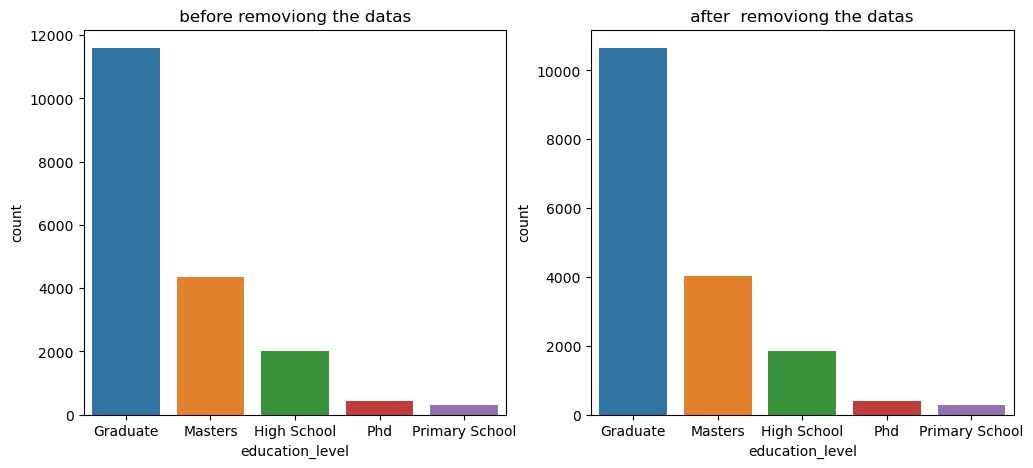

In [84]:
# barplot to see the ddifference between the oroginal dand the cca performed datas 
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title(" before removiong the datas ")
sns.countplot(x='education_level', data=df,ax=ax1)

ax2.set_title(" after  removiong the datas ")
sns.countplot(x='education_level', data=new_df,ax=ax2) # this is original
plt.show()

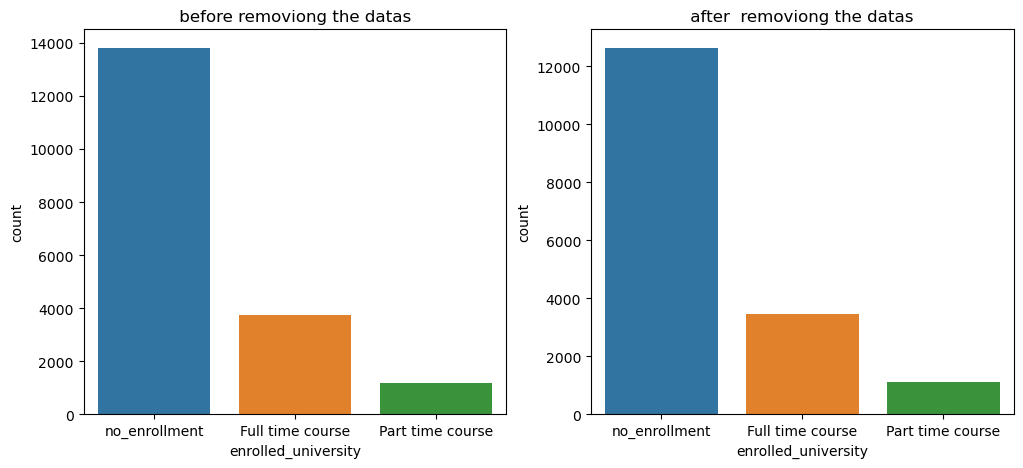

In [85]:
# barplot to see the ddifference between the oroginal dand the cca performed datas for the enrolled university  
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title(" before removiong the datas ")
sns.countplot(x='enrolled_university', data=df,ax=ax1)

ax2.set_title(" after  removiong the datas ")
sns.countplot(x='enrolled_university', data=new_df,ax=ax2) # this is original
plt.show()

In [86]:
df['enrolled_university'].value_counts()

no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

In [88]:
new_df['enrolled_university'].value_counts()

no_enrollment       12632
Full time course     3449
Part time course     1101
Name: enrolled_university, dtype: int64

In [89]:
# the difference betweeen the value 
df['enrolled_university'].value_counts()-new_df['enrolled_university'].value_counts()

no_enrollment       1185
Full time course     308
Part time course      97
Name: enrolled_university, dtype: int64

# same code foe the eduacations level

In [90]:
df['education_level'].value_counts() # original datas 

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [91]:
new_df['education_level'].value_counts() # cca performed datas 

Graduate          10650
Masters            4022
High School        1845
Phd                 380
Primary School      285
Name: education_level, dtype: int64

In [92]:
# difference between the two datas 
df['education_level'].value_counts()-new_df['education_level'].value_counts()

Graduate          948
Masters           339
High School       172
Phd                34
Primary School     23
Name: education_level, dtype: int64

In [96]:
# perfrom the experiment if the heatmap is shiow the randomness of the data or not
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [97]:
df.dropna(inplace=True)

In [98]:
df.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
training_hours            0
target                    0
dtype: int64

In [99]:
df.shape

(8434, 13)

In [110]:
df.loc[:5000, ['city','training_hours']] = np.nan
print(" sucess")

 sucess


In [111]:
df.isnull().sum()

enrollee_id                  0
city                      2244
city_development_index       0
gender                       0
relevent_experience          0
enrolled_university          0
education_level              0
major_discipline             0
experience                   0
company_size                 0
company_type                 0
training_hours            2244
target                       0
dtype: int64

In [103]:
df.head(40)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
1,29725,NaN,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,NaN,0.0
4,666,NaN,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,NaN,0.0
7,402,NaN,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13.0,<10,Pvt Ltd,NaN,1.0
8,27107,NaN,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7.0,50-99,Pvt Ltd,NaN,1.0
11,23853,NaN,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5.0,5000-9999,Pvt Ltd,NaN,0.0
12,25619,NaN,0.913,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,1000-4999,Pvt Ltd,NaN,0.0
15,6588,NaN,0.926,Male,Has relevent experience,no_enrollment,Graduate,STEM,16.0,10/49,Pvt Ltd,NaN,0.0
20,31972,NaN,0.843,Male,Has relevent experience,no_enrollment,Masters,STEM,11.0,100-500,Pvt Ltd,NaN,0.0
21,19061,NaN,0.926,Male,Has relevent experience,no_enrollment,Masters,STEM,11.0,100-500,Pvt Ltd,NaN,0.0
23,7041,NaN,0.776,Male,Has relevent experience,no_enrollment,Graduate,Humanities,0.0,1000-4999,Pvt Ltd,NaN,0.0


<AxesSubplot:>

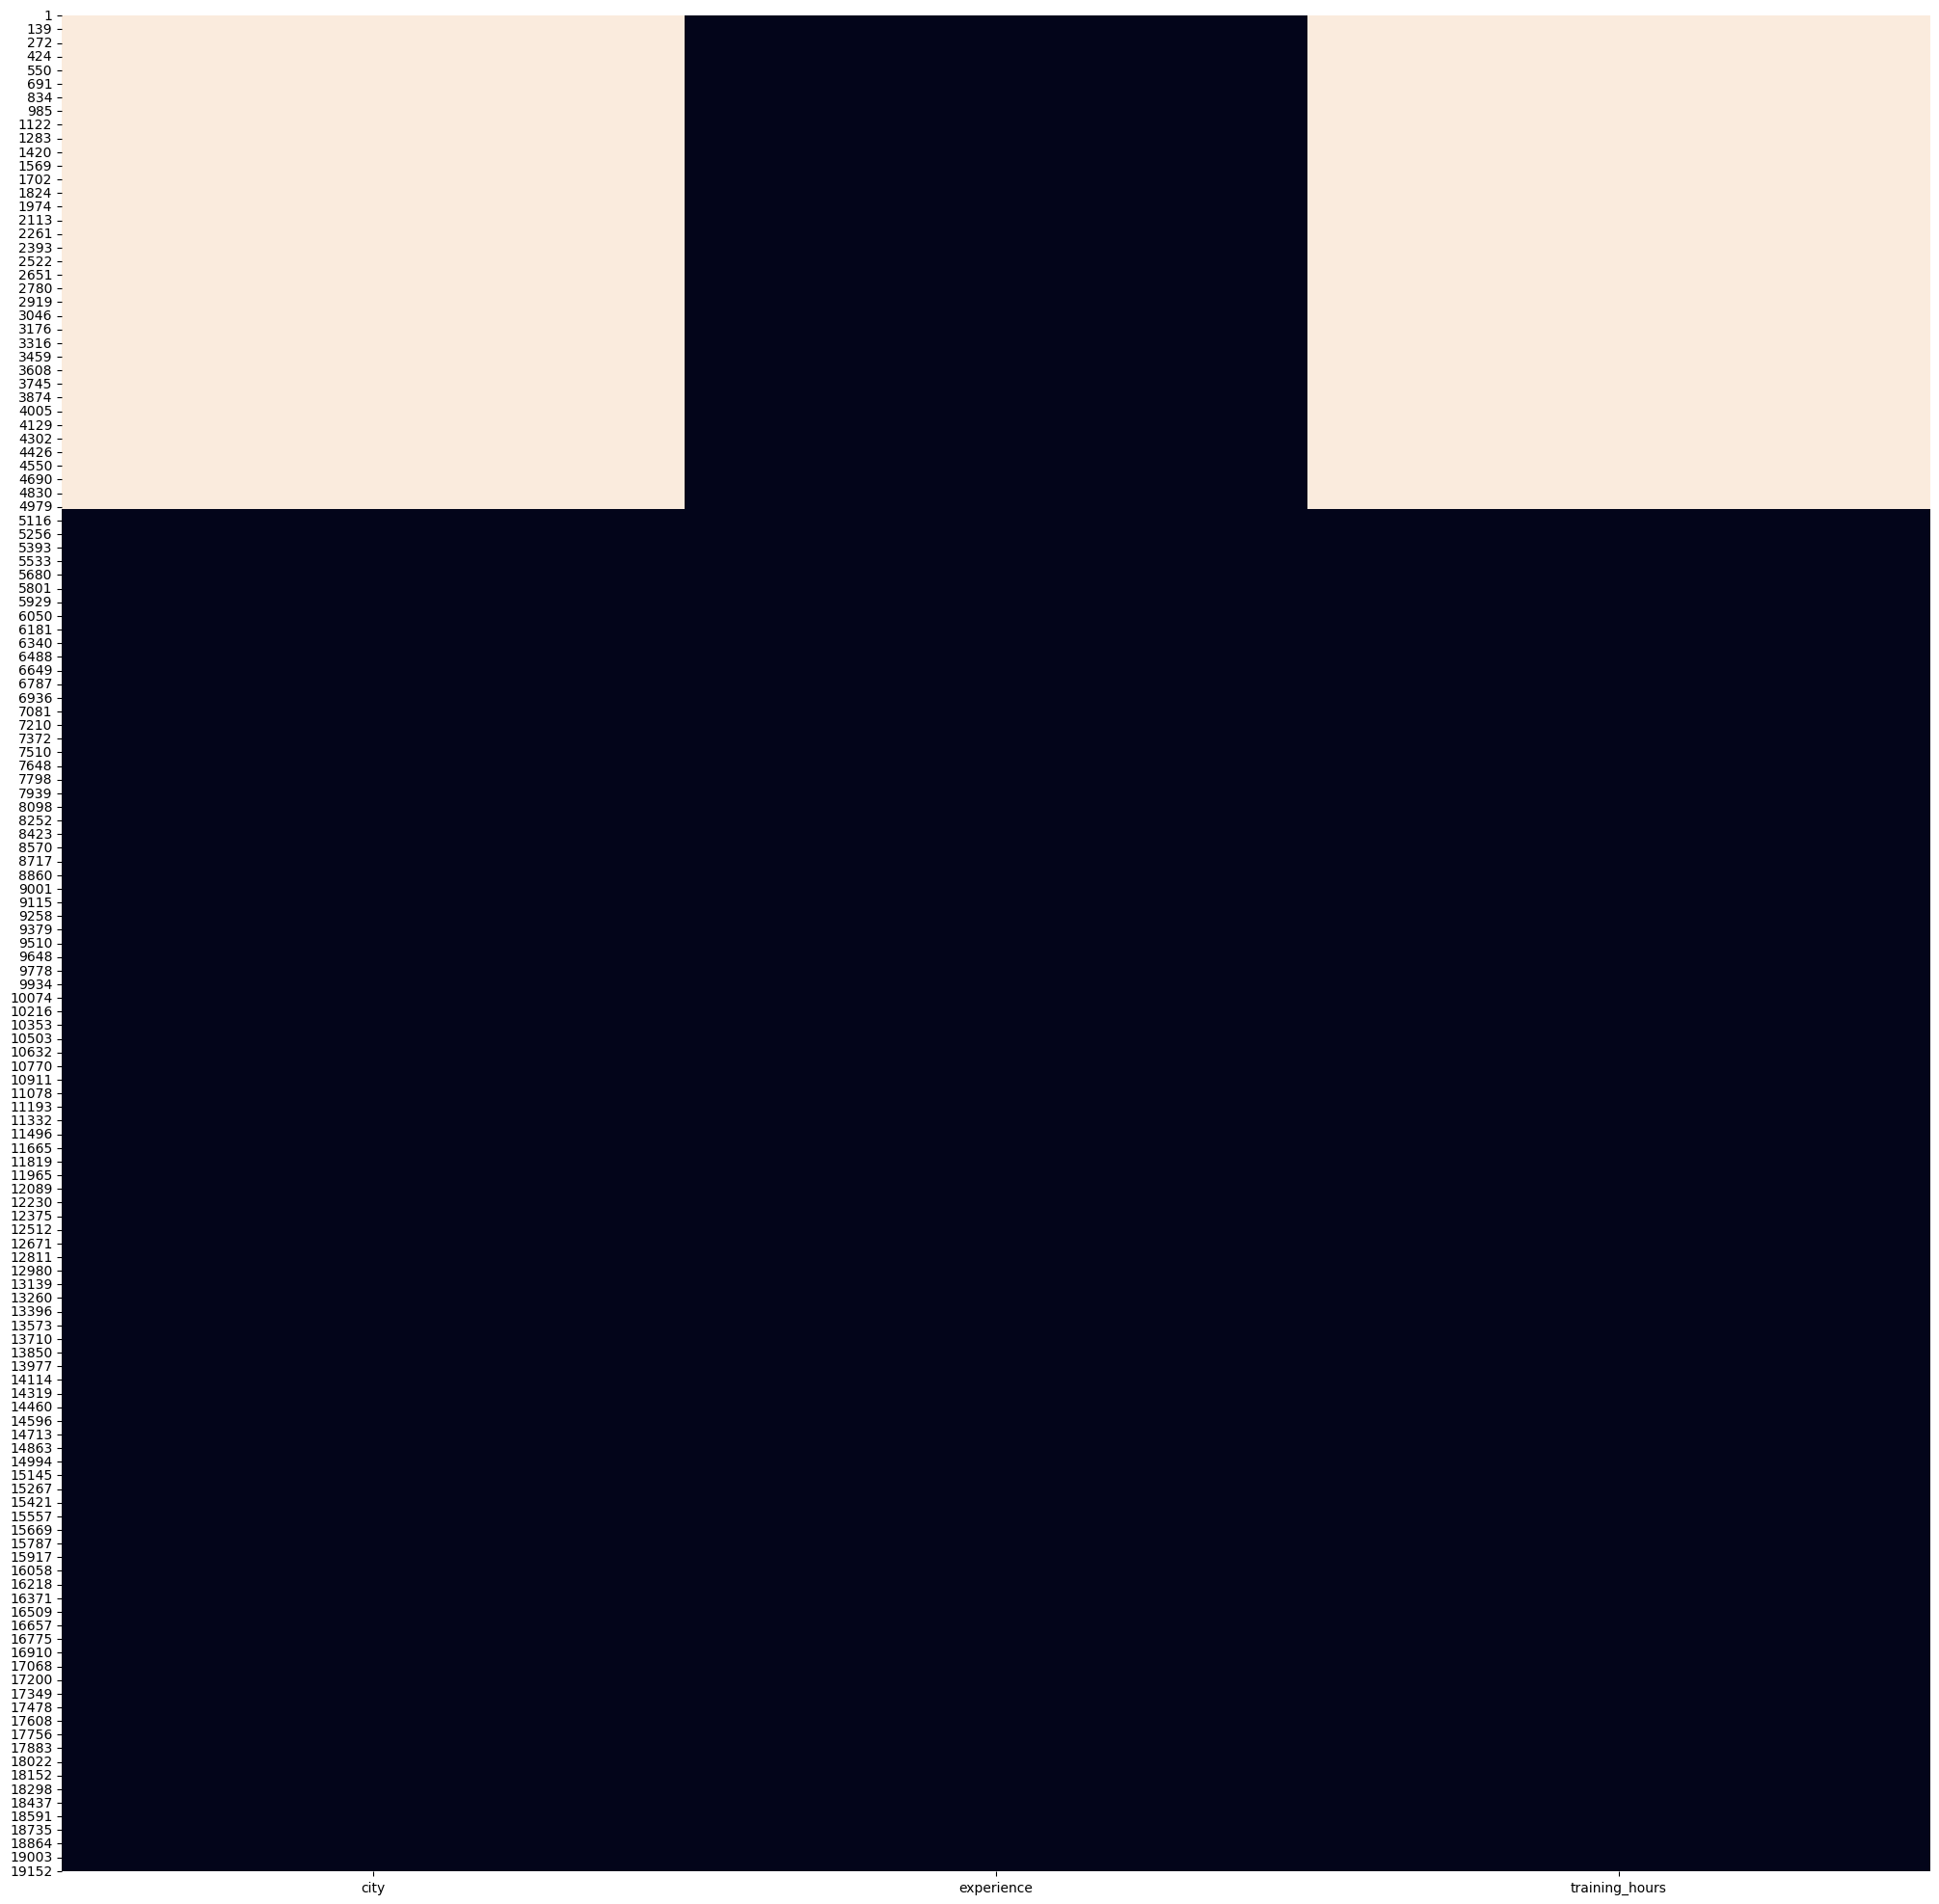

In [112]:
# see the null values in the heatmaps
plt.figure(figsize=(25,25))  # here the white data is the missing values the first 4979 data are missing 
sns.heatmap(df[['city','experience','training_hours']].isnull(),cbar=False)

In [113]:
df.loc[7000:, ['city','training_hours']] = np.nan  # apply nan to the last datas after the 7000
print(" sucess")

 sucess


<AxesSubplot:>

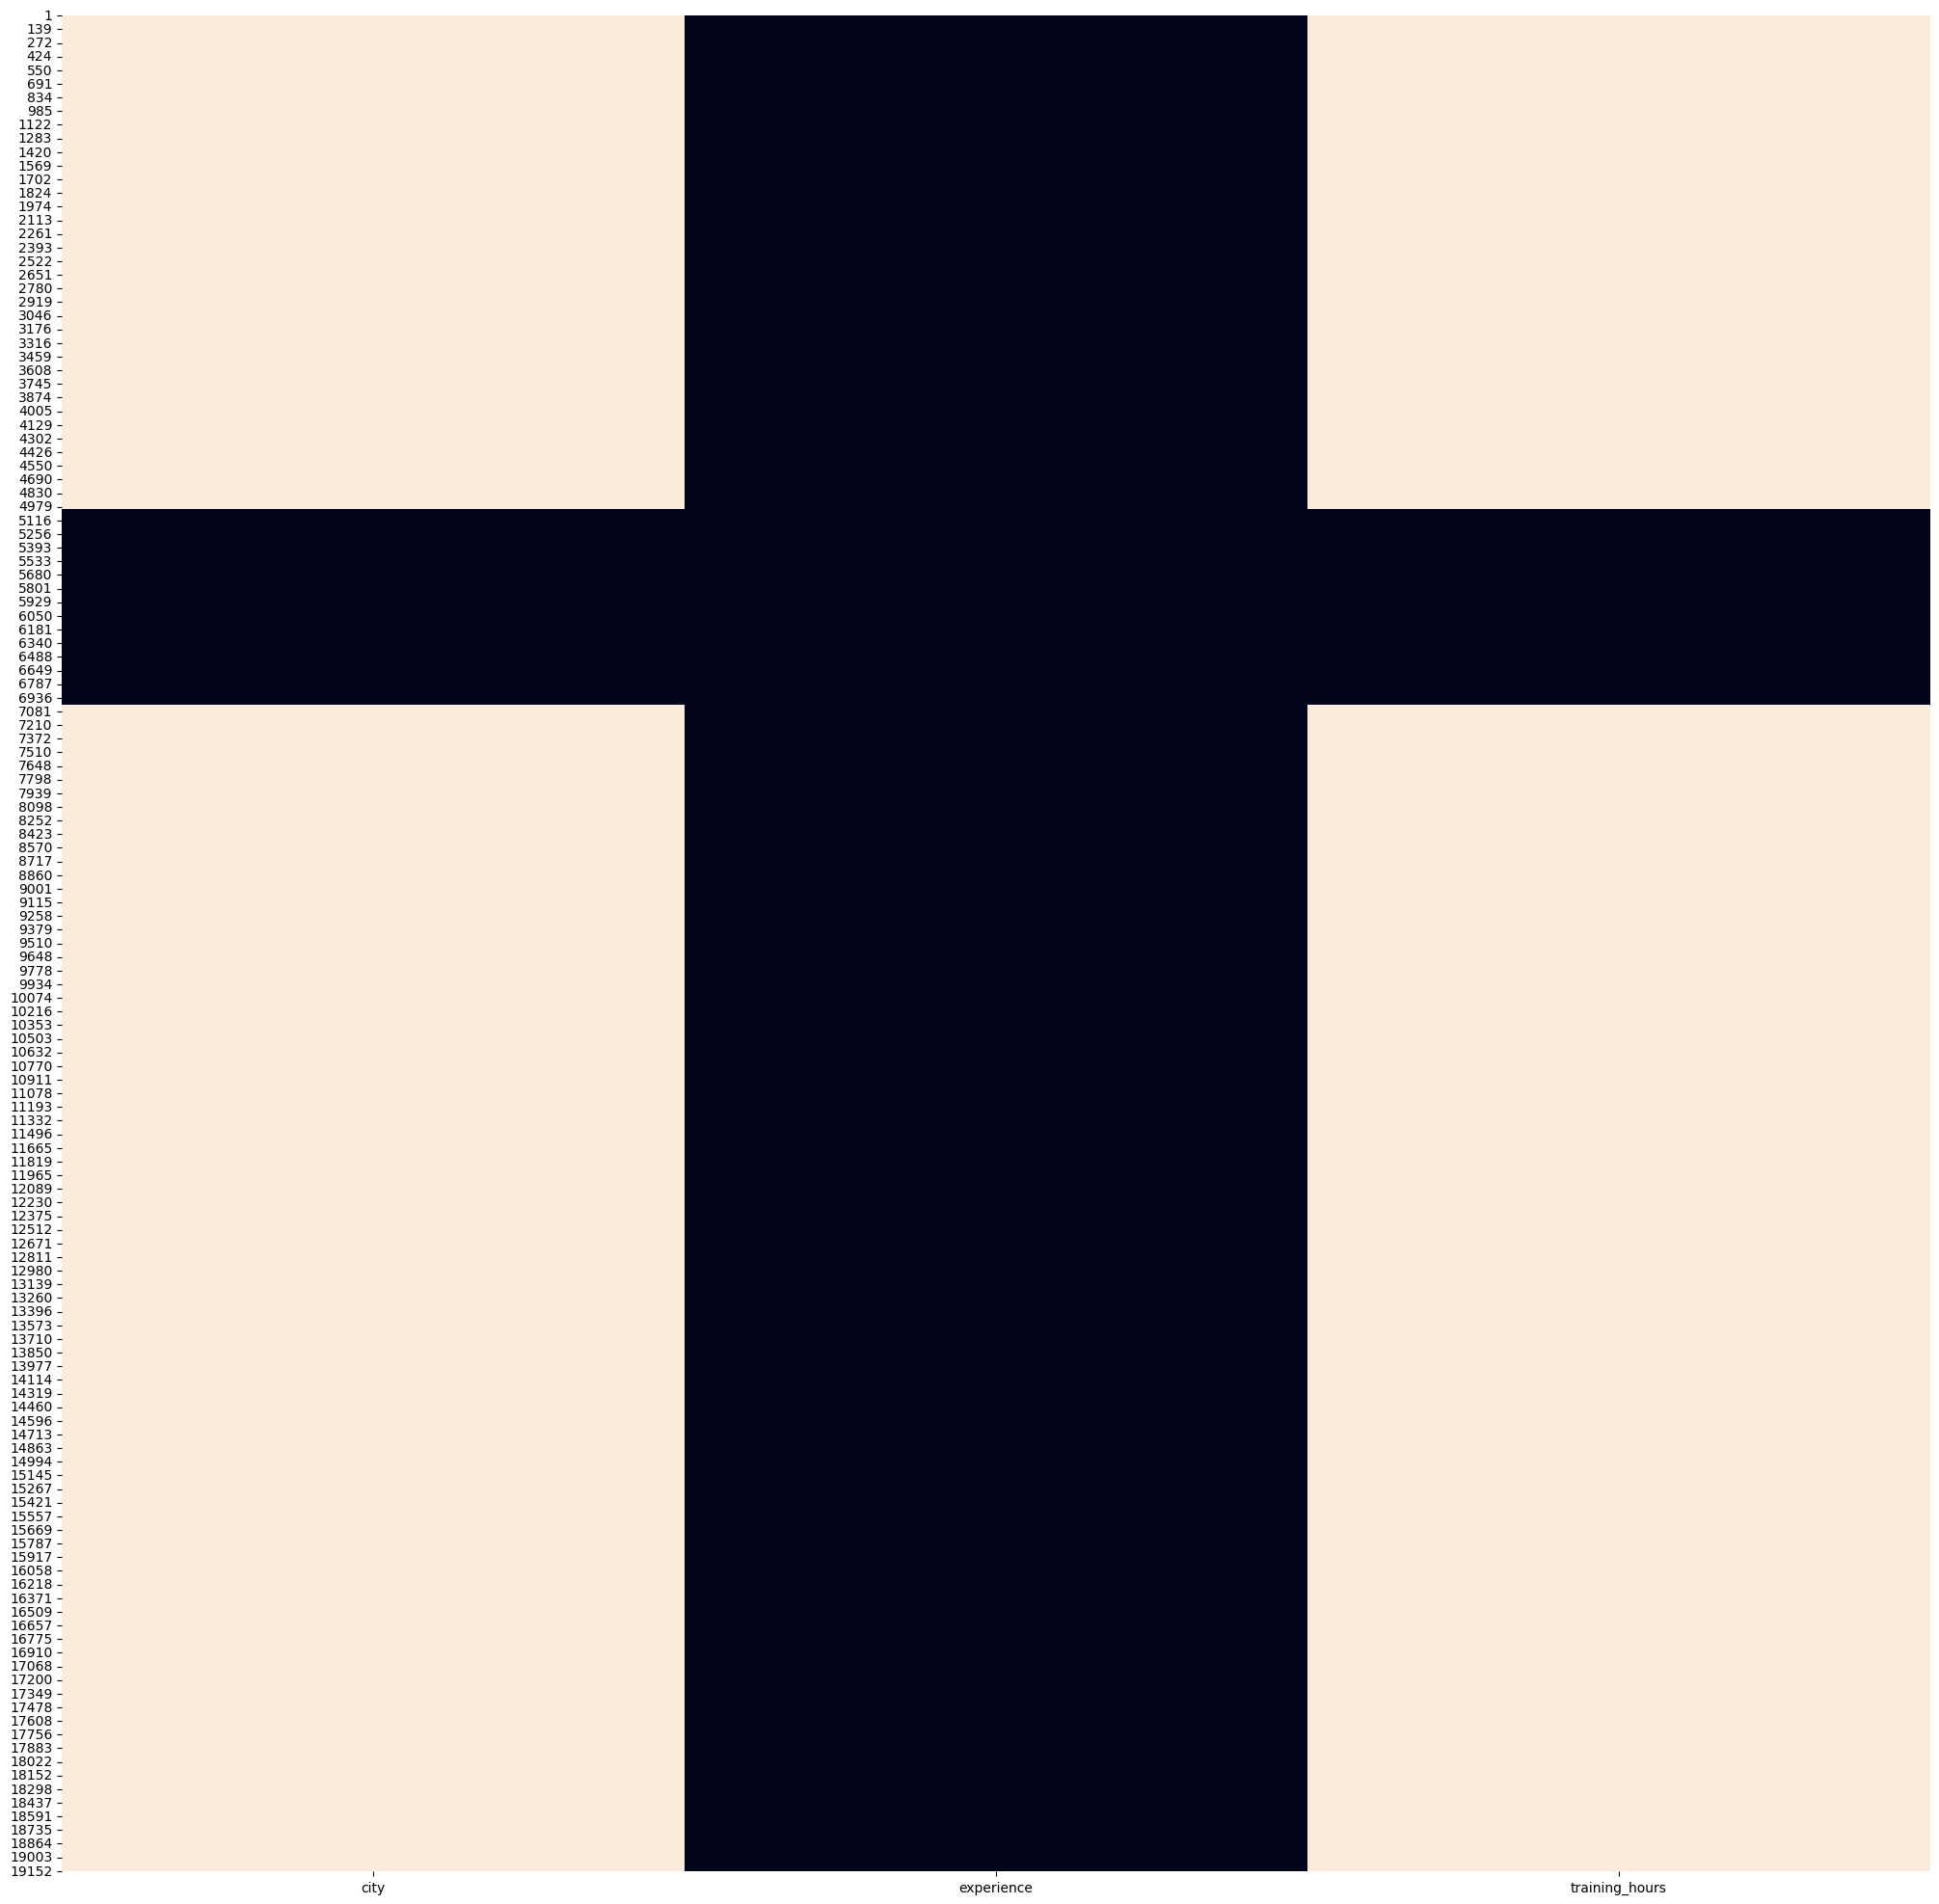

In [114]:
plt.figure(figsize=(25,25))  # here the white data is the missing values the first 4979 data are missing 
sns.heatmap(df[['city','experience','training_hours']].isnull(),cbar=False)
# from the both side the data are missing  datas are randomness 
# best visuylation tyool to check the data is missing random or not 

In [115]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

In [117]:
type(cancer)

sklearn.utils.Bunch

In [118]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])